In [ ]:
import sys
sys.path.append("/home/ljq/code/Kludge_EMRI")
from src.emrikludge.parameters import EMRIParameters, WaveformConfig
from src.emrikludge.core.aak_cpu import generate_aak_waveform_cpu

params = EMRIParameters(M=1.0e6, mu=10.0, a=0.7,
                        p0=10.0, e0=0.3, iota0=0.3)
config = WaveformConfig(dt=10.0, T=2*365.25*86400.0)

t, hI, hII, hp, hx = generate_aak_waveform_cpu(params, config)
print(f"Generated waveform with {len(t)} samples.")

Generated waveform with 6311520 samples.


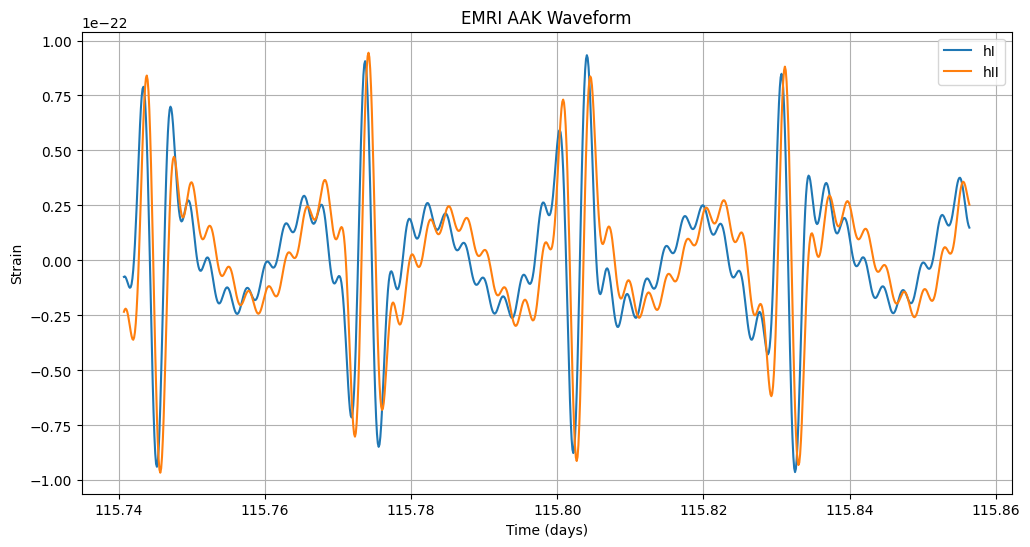

In [4]:
#绘制波形图
from matplotlib import pyplot as plt
start=1000000
length=1000
plt.figure(figsize=(12, 6))
plt.plot(t[start:start+length] / 86400.0, hI[start:start+length], label='hI')
plt.plot(t[start:start+length] / 86400.0, hII[start:start+length], label='hII')
plt.xlabel('Time (days)')
plt.ylabel('Strain')
plt.title('EMRI AAK Waveform')
plt.legend()
plt.grid()
plt.show()